# Identitas 

- Nama: Alfina Richi 
- Batch: 6
- ID  : 9326862

# Background 

  
* Diberikan sebuah dataset yang berisi berbagai fitur dan kesehatan individu, tujuannya adalah untuk mengembangkan model prediktif yang dapat mengklasifikasikan dengan akurat apakah seseorang berisiko mengalami stroke. Model harus mempertimbangkan faktor-faktor seperti usia, jenis kelamin, hipertensi, penyakit jantung, status merokok, dan BMI untuk melakukan prediksi. Tujuannya adalah menciptakan alat yang dapat diandalkan untuk membantu profesional kesehatan dalam mengidentifikasi individu yang mungkin rentan terhadap stroke sehingga langkah pencegahan dapat diambil untuk mengurangi risiko.



# Problem Statement 

* Penyakit Stroke merupakan salah satu masalah kesehatan yang dapat mengancam jiwa, masih banyak sekali kesulitan yang ditemukan dalam mengidentifikasi individu yang mengalami stroke. Oleh karena itu diperlukan pengembangan model prediktif yang dapat memprediksi risiko seseorang mengalami stroke berdasarkan faktor-faktor risiko tertentu. 

# Key Question 
* Apakah terdapat rentang usia tertentu yang lebih rentan terhadap stroke ? 
* Seberapa besar pengaruh hipertensi terhadap risiko stroke?
* Apakah tingkat glukosa darah rata-rata berkorelasi dengan risiko stroke?
* Apakah status merokok (formerly smoked, never smoked, smokes) memengaruhi risiko stroke?
* Apakah terdapat pola hubungan antara BMI dan kejadian stroke?







# Atribut Information 

*  id: unique identifier
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index => weight in kilograms / the square of height in meters
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
* stroke: 1 if the patient had a stroke or 0 if not


    

# Import Library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, \
OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score


# Data Loading

In [2]:
df= pd.read_csv('C:/Users/penof/Documents/5 sem/Kapita Salekta RPL/Tugas Besar KS-RPL/healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.shape

(5110, 12)

In [6]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


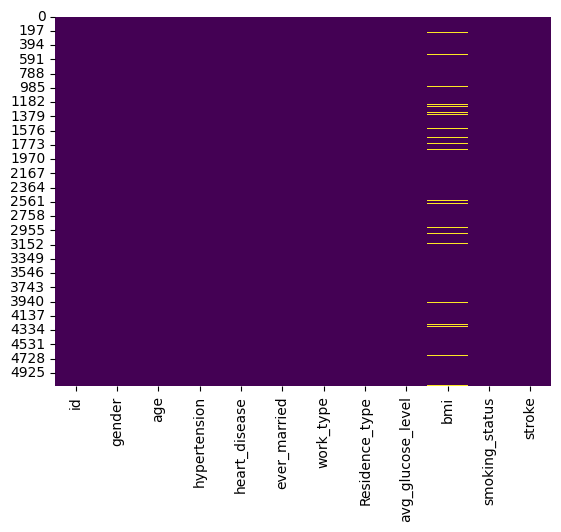

In [8]:
sns.heatmap(df.isnull(),cmap = 'viridis',cbar = False);

berdasarkan hasil diatas bahwa hanya BMI yang memiliki nilai nulls 

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool

# EDA (Exploratory Data Analysis)

In [10]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [11]:
discrete = df.select_dtypes(include=['int64','float64']).columns.tolist()
discrete

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [12]:
categorical_feature= df.columns[df.dtypes=='object'].tolist()
print(categorical_feature)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


(array([175., 145., 114., 109., 102., 151., 170., 106., 164., 174., 160.,
        150., 179., 200., 218., 141., 222., 220., 169., 262., 255., 220.,
        150., 189., 156., 160.,  91., 143., 229., 186.]),
 array([8.00000000e-02, 2.81066667e+00, 5.54133333e+00, 8.27200000e+00,
        1.10026667e+01, 1.37333333e+01, 1.64640000e+01, 1.91946667e+01,
        2.19253333e+01, 2.46560000e+01, 2.73866667e+01, 3.01173333e+01,
        3.28480000e+01, 3.55786667e+01, 3.83093333e+01, 4.10400000e+01,
        4.37706667e+01, 4.65013333e+01, 4.92320000e+01, 5.19626667e+01,
        5.46933333e+01, 5.74240000e+01, 6.01546667e+01, 6.28853333e+01,
        6.56160000e+01, 6.83466667e+01, 7.10773333e+01, 7.38080000e+01,
        7.65386667e+01, 7.92693333e+01, 8.20000000e+01]),
 <BarContainer object of 30 artists>)

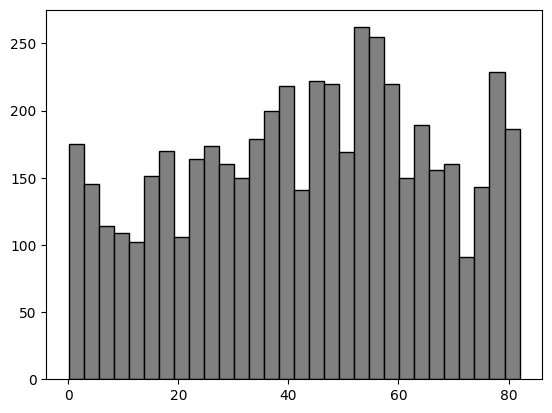

In [13]:
plt.hist(df['age'], color = 'gray', edgecolor = 'black', bins = 30)

* terlihat distribusi data age mengalami pola yang turun naik hal ini menunjukkan data tidak simetris

* ternyata pasien kebanyakan di usia 40 tahunan, dan usia minimumnya ada di bawah 20 tahun

**Apakah terdapat rentang usia tertentu yang lebih rentan terhadap stroke ?**

In [14]:
df[df['age'] <= 1][['age', 'stroke']]

,age,stroke
363,0.64,0
376,0.88,0
564,0.32,0
844,1.00,0
951,1.00,0
982,0.88,0
996,0.24,0
1093,0.32,0
1206,0.72,0
1317,0.80,0


In [15]:
stroke_counts= df['stroke'].value_counts().reset_index()
stroke_counts

,stroke,count
0,0,4861
1,1,249


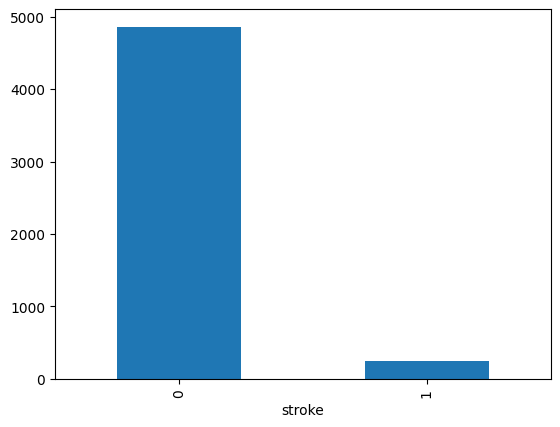

In [16]:
df["stroke"].value_counts().plot(kind="bar");

ada sekitar 4861 orang yang tidak terkena stroke,jika dibandingkan dengan orang penderita stroke jelas sekali data ini tidak seimbang dan mungkin hasil prediksi akan menjadi error 

In [17]:
stroke_dist = df['stroke'].value_counts(normalize=True)
stroke_dist.values

array([0.95127202, 0.04872798])